In [1]:
from keras.layers import Dense
from xgboost import XGBClassifier
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [117]:
Data=pd.read_csv('santander-customer-transaction-prediction/train.csv')
Data=Data.sample(frac=1).reset_index(drop=True)
Data=Data.drop(['ID_code'],'columns')
Data=Data[Data.target==1].append(Data[Data.target==0].head(20098))
Data=Data.sample(frac=1).reset_index(drop=True)

In [127]:
features=Data.columns.values[2:202]
correlation=Data[features].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlation=correlation[correlation['level_0']!=correlation['level_1']]
correlation = correlation[correlation.values[:,2]>0.0099]
target=correlation.values[:,1]
target=target[::2]
target=target.reshape(target.shape[0],1)
target=np.unique(target)
Data=Data.drop(target,'columns')
Data

,target,var_0,var_185
0,0,10.2158,-7.5443
1,0,14.4141,1.4879
2,0,12.8971,1.1912
3,1,12.3470,-5.7293
4,1,14.9837,-9.1620
5,1,9.4185,-1.6982
6,0,10.3376,-4.1748
7,0,12.5072,-6.3937
8,1,8.3939,3.0986
9,0,7.6809,-5.4373


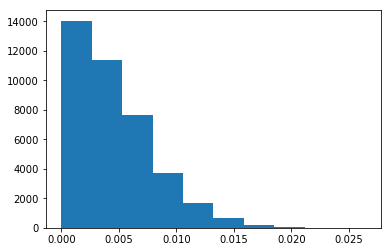

In [119]:
import matplotlib.pyplot as plt
plt.hist(correlation.values[:,2])
plt.show()

In [120]:
correlation = correlation[correlation.values[:,2]>0.0099]
target=correlation.values[:,1]
target=target[::2]
target

array(['var_81', 'var_166', 'var_71', ..., 'var_81', 'var_164', 'var_43'], dtype=object)

In [132]:
Data.values[:,2]

array([-7.5443,  1.4879,  1.1912, ..., -3.9422, -4.8426, -3.2327])

In [123]:
target=target.reshape(1664,1)
target.shape

(1664, 1)

In [124]:
target=np.unique(target)
target

array(['var_1', 'var_10', 'var_100', 'var_101', 'var_102', 'var_103',
       'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109',
       'var_11', 'var_110', 'var_111', 'var_112', 'var_113', 'var_114',
       'var_115', 'var_116', 'var_117', 'var_118', 'var_119', 'var_12',
       'var_120', 'var_121', 'var_122', 'var_123', 'var_124', 'var_125',
       'var_126', 'var_127', 'var_128', 'var_129', 'var_13', 'var_130',
       'var_131', 'var_132', 'var_133', 'var_134', 'var_135', 'var_136',
       'var_137', 'var_138', 'var_139', 'var_14', 'var_140', 'var_141',
       'var_142', 'var_143', 'var_144', 'var_145', 'var_146', 'var_147',
       'var_148', 'var_149', 'var_15', 'var_150', 'var_151', 'var_152',
       'var_153', 'var_154', 'var_155', 'var_156', 'var_157', 'var_158',
       'var_159', 'var_16', 'var_160', 'var_161', 'var_162', 'var_163',
       'var_164', 'var_165', 'var_166', 'var_167', 'var_168', 'var_169',
       'var_17', 'var_170', 'var_171', 'var_172', 'var_173',

In [125]:
target.shape

(198,)

In [126]:
D=Data.drop(target,'columns')
D

,target,var_0,var_185
0,0,10.2158,-7.5443
1,0,14.4141,1.4879
2,0,12.8971,1.1912
3,1,12.3470,-5.7293
4,1,14.9837,-9.1620
5,1,9.4185,-1.6982
6,0,10.3376,-4.1748
7,0,12.5072,-6.3937
8,1,8.3939,3.0986
9,0,7.6809,-5.4373


In [103]:
x,X0,y,Y0=train_test_split(X,Y,test_size=0.25,random_state=42)
X1,X2,Y1,Y2=train_test_split(x,y,test_size=0.5,random_state=42)

In [104]:
model1=XGBClassifier()
model2=SGDClassifier(alpha=0.00701,random_state=64,n_iter=4,n_jobs=-1)
model3=AdaBoostClassifier(LogisticRegression(C=9.1,max_iter=1000,verbose=0,n_jobs=-1,solver='sag'))
model4=SVC(coef0=0.9,degree=6,random_state=0,kernel='poly')
model5=KNeighborsClassifier(leaf_size=3,n_neighbors=4,p=2,n_jobs=-1)
model6=RandomForestClassifier(n_estimators=66,max_depth=2,min_samples_leaf=0.1,min_samples_split=0.1,random_state=0,n_jobs=-1)

C:\Users\rampr\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [105]:
final = Sequential()
final.add(Dense(units = 1024, input_dim=X.shape[1], activation = 'relu'))     #Hidden Layer 1 with 512 nods and relu actification function
final.add(Dense(units = 512, activation = 'sigmoid'))     #Hidden Layer 2 with 256 nods and relu actification function
final.add(Dense(units = 256, activation = 'relu'))     #Hidden Layer 2 with 256 nods and relu actification function
final.add(Dense(units = 128, activation = 'sigmoid'))     #Hidden Layer 3 with 5128 nods and relu actification function
final.add(Dense(units = 64, activation = 'sigmoid'))
final.add(Dense(units = 1, activation = 'sigmoid'))   #Output Layer 4 with 62 nods and sigmoid actification function

final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #Adam Optimizer


In [ ]:
model1.fit(X0,Y0)
model2.fit(X0,Y0)
model3.fit(X0,Y0)
model4.fit(X0,Y0)
model5.fit(X0,Y0)
model6.fit(X0,Y0)

In [ ]:
Xmp=model1.predict(X1)
Xmp=np.append(Xmp,model2.predict(Xmp).reshape(Xmp.shape[0],1), axis=1)
Xmp=np.append(Xmp,model3.predict(Xmp).reshape(Xmp.shape[0],1), axis=1)
Xmp=np.append(Xmp,model4.predict(Xmp).reshape(Xmp.shape[0],1), axis=1)
Xmp=np.append(Xmp,model5.predict(Xmp).reshape(Xmp.shape[0],1), axis=1)
Xmp=np.append(Xmp,model6.predict(Xmp).reshape(Xmp.shape[0],1), axis=1)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,...,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000
mean,0.500000,10.900694,-1.372290,10.926077,6.830321,11.100943,-4.723319,5.484211,16.512380,0.386093,...,3.574776,7.615577,1.840381,3.241596,17.898202,-0.085334,2.490530,8.869306,15.664521,-3.018717
std,0.500006,3.155630,4.125188,2.739550,2.059930,1.628233,8.011988,0.892864,3.406666,3.325999,...,4.695407,3.118686,1.485509,4.025340,3.170687,1.456655,5.504951,0.939056,3.126172,10.431851
min,0.000000,0.408400,-14.091000,2.117100,0.374000,5.834300,-28.246100,2.496000,5.349700,-9.991100,...,-14.093300,-2.343000,-3.814500,-11.783400,9.827700,-5.018500,-14.020400,6.119000,6.558700,-38.852800
25%,0.000000,8.566400,-4.541200,8.841050,5.284950,9.897475,-10.944150,4.818075,13.897300,-2.190525,...,0.149625,5.259675,0.784100,0.486325,15.534925,-1.136950,-1.767850,8.214275,13.572875,-10.818875
50%,0.500000,10.741250,-1.344400,10.822300,6.867750,11.128950,-4.471800,5.473200,16.415750,0.503400,...,3.550000,7.533100,1.789600,3.284650,17.849350,-0.118250,2.645400,8.854500,15.711450,-2.509300
75%,1.000000,13.039025,1.628600,12.749625,8.358925,12.287125,1.283050,6.092450,19.051425,3.017125,...,6.841650,9.713375,2.870525,6.128550,20.322475,0.896925,6.760350,9.572325,17.948225,5.148700
max,1.000000,20.315000,9.304300,18.410100,13.188300,15.991400,17.251600,8.285200,27.039800,10.151300,...,16.746100,16.520500,7.647600,17.239300,27.295300,4.088100,17.332600,11.827700,25.857100,27.534000


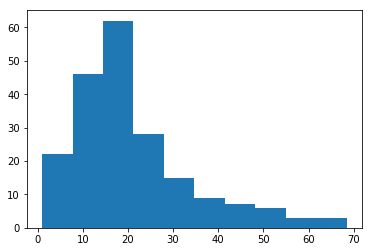

In [73]:
plt.hist(x.values[7,:])
plt.show()

In [9]:
X=preprocessing.MinMaxScaler().fit_transform(Data.values[:,1:])
X, X1, y, y1 = model_selection.train_test_split(Data.values[:,1:], Data.values[:,0], test_size=0.25, random_state=42)

In [10]:
model=XGBClassifier()
model1=linear_model.SGDClassifier(alpha=0.00701,random_state=64,n_iter=4,n_jobs=-1)
model2=neighbors.KNeighborsClassifier(leaf_size=3,n_neighbors=4,p=2,n_jobs=-1)
model3=ensemble.RandomForestClassifier(n_estimators=66,max_depth=2,min_samples_leaf=0.1,min_samples_split=0.1,random_state=0,n_jobs=-1)

final1=neural_network.MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter=450,random_state=95,beta_1=0.90000000000000002,beta_2=0.70000000000000007)


C:\Users\rampr\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [12]:
model.fit(X,y)
model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)
final1.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.7000000000000001, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=450, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=95, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
pre1=model.predict(X1)
pre2=model1.predict(X1)
pre3=model2.predict(X1)
pre4=model3.predict(X1)
pre5=final1.predict(X1)

In [15]:
roc_auc_score(y1, pre1)

0.74540002855213439

In [16]:
roc_auc_score(y1, pre2)

0.73926326066007086

In [17]:
roc_auc_score(y1, pre3)

0.53482490902770319

In [18]:
roc_auc_score(y1, pre4)

0.68353957972272428

In [19]:
roc_auc_score(y1, pre5)

0.74933482004074614

In [11]:
final1.fit(Xhidden,y2)
final2.fit(Xhidden,y2)

Xhidden1=model.predict(X3).reshape(X3.shape[0],1)
Xhidden1=np.append(Xhidden1,model1.predict(X3).reshape(Xhidden1.shape[0],1), axis=1)
Xhidden1=np.append(Xhidden1,model2.predict(X3).reshape(Xhidden1.shape[0],1), axis=1)
Xhidden1=np.append(Xhidden1,model3.predict(X3).reshape(Xhidden1.shape[0],1), axis=1)

Xhidden2=final1.predict(Xhidden1).reshape(Xhidden1.shape[0],1)
Xhidden2=np.append(Xhidden2,final2.predict(Xhidden1).reshape(Xhidden2.shape[0],1), axis=1)

In [12]:
final=XGBClassifier()
final.fit(Xhidden2,y3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
Xhidden3=model.predict(X4).reshape(X4.shape[0],1)
Xhidden3=np.append(Xhidden3,model1.predict(X4).reshape(Xhidden3.shape[0],1), axis=1)
Xhidden3=np.append(Xhidden3,model2.predict(X4).reshape(Xhidden3.shape[0],1), axis=1)
Xhidden3=np.append(Xhidden3,model3.predict(X4).reshape(Xhidden3.shape[0],1), axis=1)

Xhidden4=final1.predict(Xhidden3).reshape(Xhidden3.shape[0],1)
Xhidden4=np.append(Xhidden4,final2.predict(Xhidden3).reshape(Xhidden4.shape[0],1), axis=1)

final.score(Xhidden4,y4)

0.74607901528687715

In [14]:
Data=pd.read_csv('santander-customer-transaction-prediction/test.csv')
Data=Data.drop(['ID_code'],'columns')

X=preprocessing.MinMaxScaler().fit_transform(Data.values)

Xhidden=model.predict(X).reshape(X.shape[0],1)
Xhidden=np.append(Xhidden,model1.predict(X).reshape(Xhidden.shape[0],1), axis=1)
Xhidden=np.append(Xhidden,model2.predict(X).reshape(Xhidden.shape[0],1), axis=1)
Xhidden=np.append(Xhidden,model3.predict(X).reshape(Xhidden.shape[0],1), axis=1)

Xhidden1=final1.predict(Xhidden).reshape(Xhidden.shape[0],1)
Xhidden1=np.append(Xhidden1,final2.predict(Xhidden).reshape(Xhidden1.shape[0],1), axis=1)

y=final.predict(Xhidden2)
y=y.astype(int)
y.shape

(10074,)

In [17]:
Data=pd.read_csv('santander-customer-transaction-prediction/test.csv')
submission = pd.DataFrame({'ID_code':Data['ID_code'],'target':y})
filename = 'Santander_Customer_Transaction_Prediction.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

ValueError: array length 10074 does not match index length 200000

In [ ]:
submission.head(100)

In [75]:
import sys
!{sys.executable} -m pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/ed/88e6bfb6ed363725480847b63d571283afb35031bc76d04d40d2c1960e78/h5py-2.9.0-cp35-cp35m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)",)': /packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl


In [1]:
import sys
!{sys.executable} -m pip install twosigmanews

  Could not find a version that satisfies the requirement twosigmanews (from versions: )
No matching distribution found for twosigmanews


In [2]:
Data=pd.read_csv('Classifier/Santander_Customer_Transaction_Prediction_1.csv')

In [3]:
import matplotlib.pyplot as plt

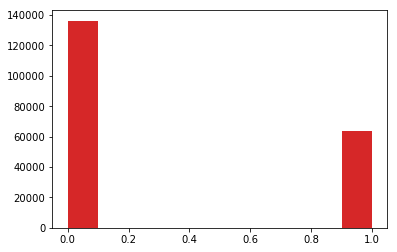

In [7]:
plt.hist(Data.values[:,1])
plt.show()